# Insurance Claim Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Importing all the necessary libraries.

# Reading and Understanding the Data

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Here we read the CSV file in jupyter notebook.

In [3]:
df=pd.DataFrame(data=df)
df.sample(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
300,259,43,132871,05-07-2009,IL,100/300,500,947.75,0,458470,...,NO,7680,1280,640,5760,Audi,A5,2008,N,NaN
211,210,37,218684,05-08-2006,IN,500/1000,2000,1048.46,0,466676,...,?,7080,1180,590,5310,Dodge,RAM,1999,N,NaN
391,297,48,751612,22-06-2009,IN,250/500,1000,1464.73,3000000,443861,...,NO,51480,5720,5720,40040,Toyota,Highlander,2013,N,NaN
358,177,33,563837,30-12-2002,IL,100/300,1000,1609.67,0,470128,...,?,82800,20700,13800,48300,Jeep,Grand Cherokee,2004,Y,NaN
101,80,27,193442,05-08-1996,IL,100/300,1000,1474.17,0,440327,...,YES,52800,10560,5280,36960,Saab,95,2004,N,NaN
319,85,30,740384,29-10-1993,IN,500/1000,1000,1454.42,0,459588,...,YES,74280,12380,12380,49520,Suburu,Forrestor,2006,Y,NaN
690,254,41,496067,22-12-1995,IL,250/500,500,1581.27,5000000,603827,...,NO,63470,5770,11540,46160,BMW,X6,1999,N,NaN
828,105,28,866805,13-12-1995,OH,250/500,500,1082.36,0,452216,...,NO,60500,12100,6050,42350,Audi,A5,1995,N,NaN
976,143,33,889764,30-11-1993,OH,500/1000,1000,1200.09,0,454191,...,?,70400,14080,7040,49280,Accura,RSX,2002,N,NaN
83,200,35,960680,21-08-1994,IN,250/500,2000,1318.06,0,618498,...,YES,6490,1180,1180,4130,Volkswagen,Jetta,2002,N,NaN


Loading the Dataset in the DataFrame and Taking out 10 samples from the dataset for our further understanding of the data.

# Data Inspection

In [4]:
df.shape

(1000, 40)

There are 1000 rows and 40 columns in our dataset .

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

It gives us the names of all the 40 columns. Here 'fraud_reported' is the target variable.

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Out of 40 , 22 columns are of object data type, 2 columns are of float data type and rest 16 columns are of integer data type.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

It gives us the Name of columns with its non-null value counts , it's datatype , index number and memory usage. Here we can see that '_c39' has 0 non-null values , hence we will drop this column.

In [8]:
df.drop(['_c39'],axis=1,inplace=True)

We have dropped column '_c39'

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


It gives us the mean, median , standard deviation, minimum and maximum of each numerical column.

# Data Cleaning

In [10]:
#Checking for Null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There are no missing values but in the sample we have studied that there are few values in column  'collision_type' , 'property_damage' and 'police_report_available'  marked as '?' , so we will replace '?' with nan values and then with the most frequent values. 

In [11]:
df['collision_type'].replace('?',np.NaN,inplace=True)
df['property_damage'].replace('?',np.NaN,inplace=True)
df['police_report_available'].replace('?',np.NaN,inplace=True)

from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['collision_type']=imp.fit_transform(df['collision_type'].values.reshape(-1,1))
df['property_damage']=imp.fit_transform(df['property_damage'].values.reshape(-1,1))
df['police_report_available']=imp.fit_transform(df['police_report_available'].values.reshape(-1,1))
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


We have replaced the '?' with the most frequent values.

<AxesSubplot:>

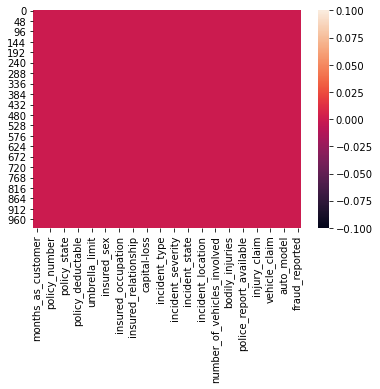

In [12]:
sns.heatmap(df.isnull())

This is the visualization of having absolute no null values in the dataset.

# Exploratory Data Analysis

# Univariate Analysis

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

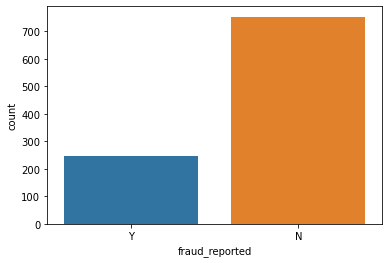

In [13]:
sns.countplot(df['fraud_reported'])

There exists a lot of class imbalance in the dataset which we will have to treat.

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

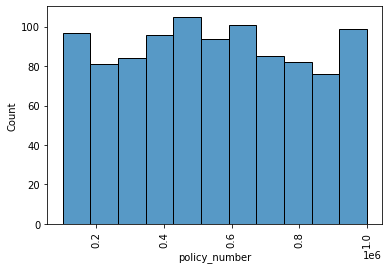

In [14]:
sns.histplot(df['policy_number'])
plt.xticks(rotation=90)

Almost all the policies are acquired equally by the people .

<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

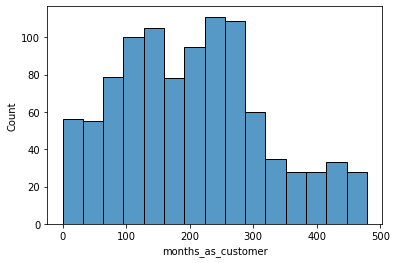

In [15]:
sns.histplot(df['months_as_customer'])

Maximum people who claim for insurance are customers for 100-300 months.

<AxesSubplot:xlabel='age', ylabel='Count'>

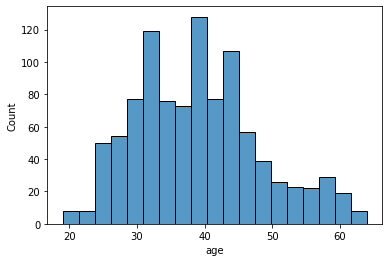

In [16]:
sns.histplot(df['age'])

Maximum people who claims insurance are of age group 30-50

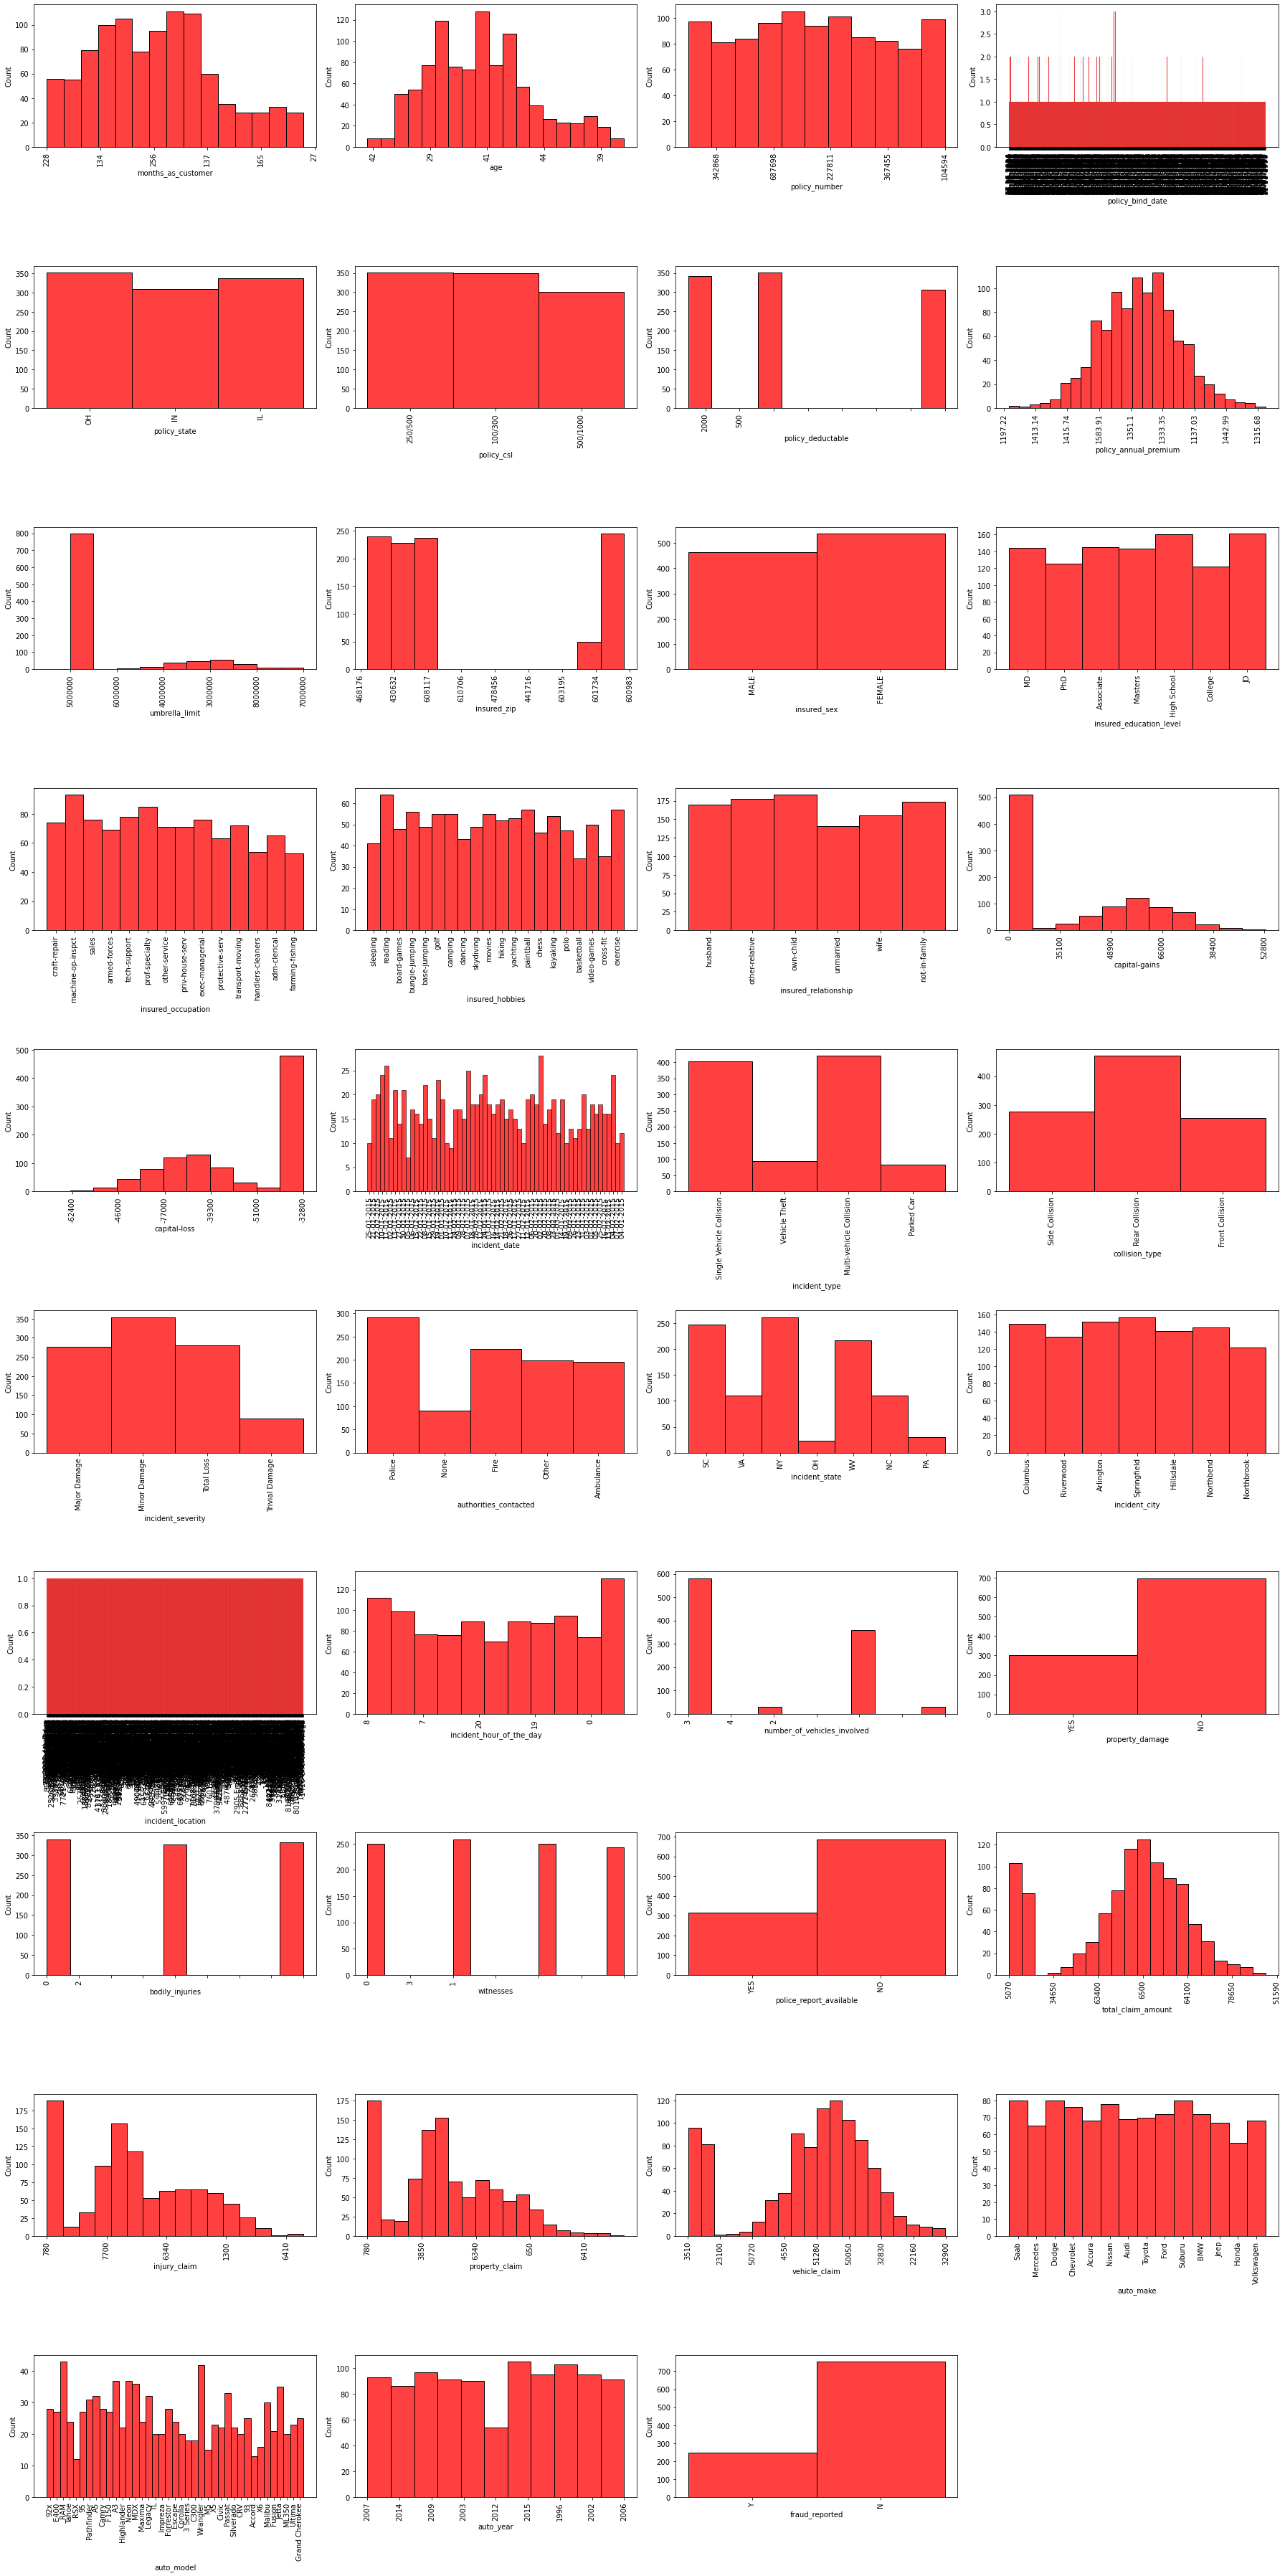

In [17]:
collist=df.columns.values
plt.figure(figsize=(25,50))
for i in range(0,len(collist)):
    plt.subplot(10,4,i+1)
    sns.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)
    plt.tight_layout()

From above graph , we can see that policy_bind_date and incident_location do not much contribute to the data. Hence we can drop them after further study.

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

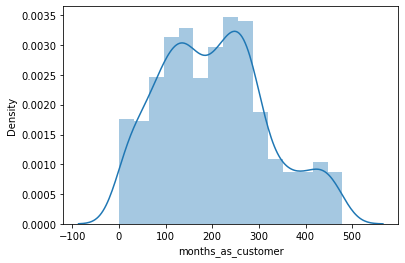

In [18]:
sns.distplot(df['months_as_customer'])

'months_as_customer' has not normalized data.

<AxesSubplot:xlabel='age', ylabel='Density'>

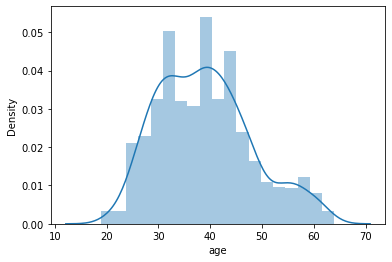

In [19]:
sns.distplot(df['age'])

'age' has not normalized data.

<AxesSubplot:xlabel='policy_number', ylabel='Density'>

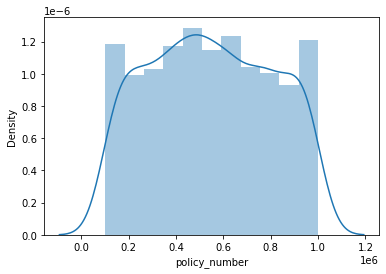

In [20]:
sns.distplot(df['policy_number'])

'policy_number' has almost normalized data

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

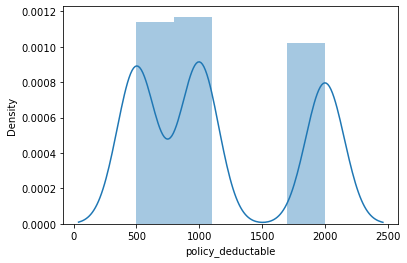

In [21]:
sns.distplot(df['policy_deductable'])

'policy_deductable' is not normalized.

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

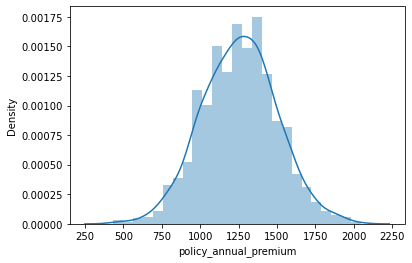

In [22]:
sns.distplot(df['policy_annual_premium'])

'policy_annual_premium' has very normalized data

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

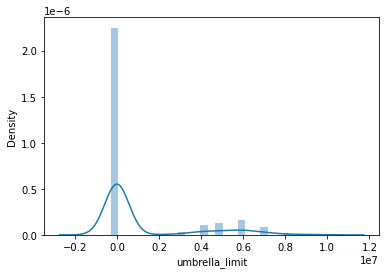

In [23]:
sns.distplot(df['umbrella_limit'])

'umbrella_limit' is almost normalized.

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

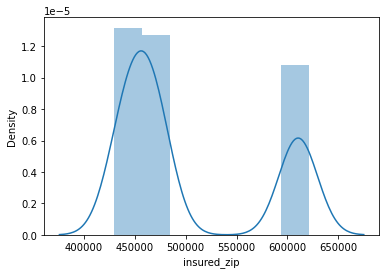

In [24]:
sns.distplot(df['insured_zip'])

'insured_zip' has no skewness in the data.

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

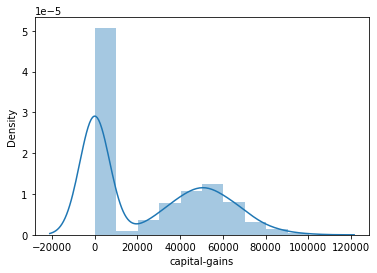

In [25]:
sns.distplot(df['capital-gains'])

There is no skewness in the data.

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

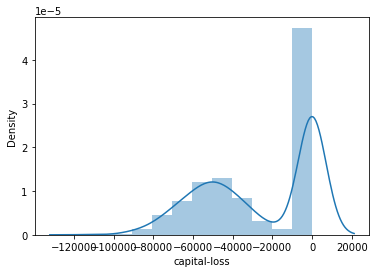

In [26]:
sns.distplot(df['capital-loss'])

There is no skewness in the data.

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

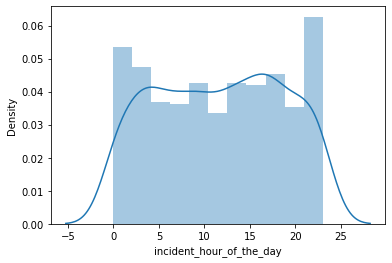

In [27]:
sns.distplot(df['incident_hour_of_the_day'])

This data is almost normalized.

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

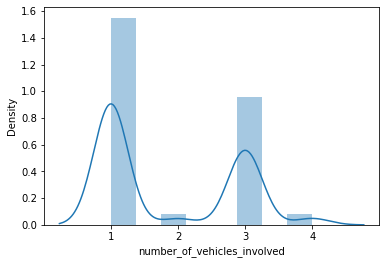

In [28]:
sns.distplot(df['number_of_vehicles_involved'])

This data does not have skewness.

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

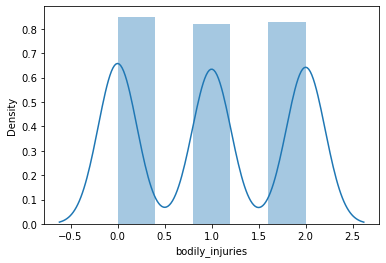

In [29]:
sns.distplot(df['bodily_injuries'])

This does not have skewness.

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

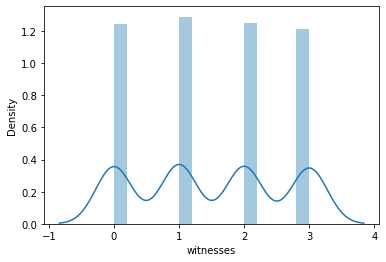

In [30]:
sns.distplot(df['witnesses'])

This data is not normalized.

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

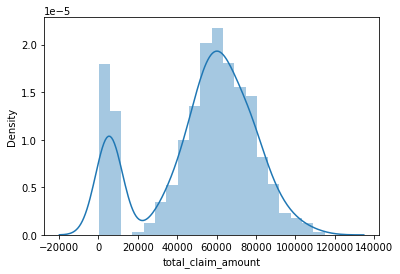

In [31]:
sns.distplot(df['total_claim_amount'])

There is no skewness.

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

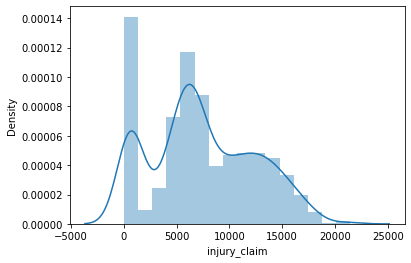

In [32]:
sns.distplot(df['injury_claim'])

'injury_claim' has not normalized data.

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

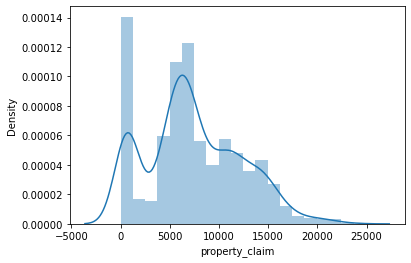

In [33]:
sns.distplot(df['property_claim'])

'property_claim'  has not normalized data.

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

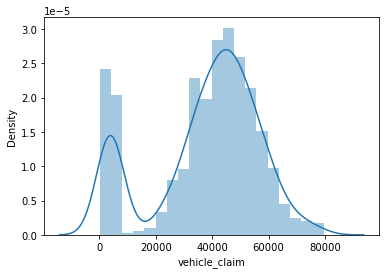

In [34]:
sns.distplot(df['vehicle_claim'])

'vehicle_claim' has no skewness in the data.

<AxesSubplot:xlabel='auto_year', ylabel='Density'>

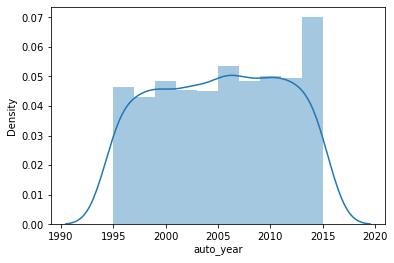

In [35]:
sns.distplot(df['auto_year'])

'auto_year' has almost normalized data.

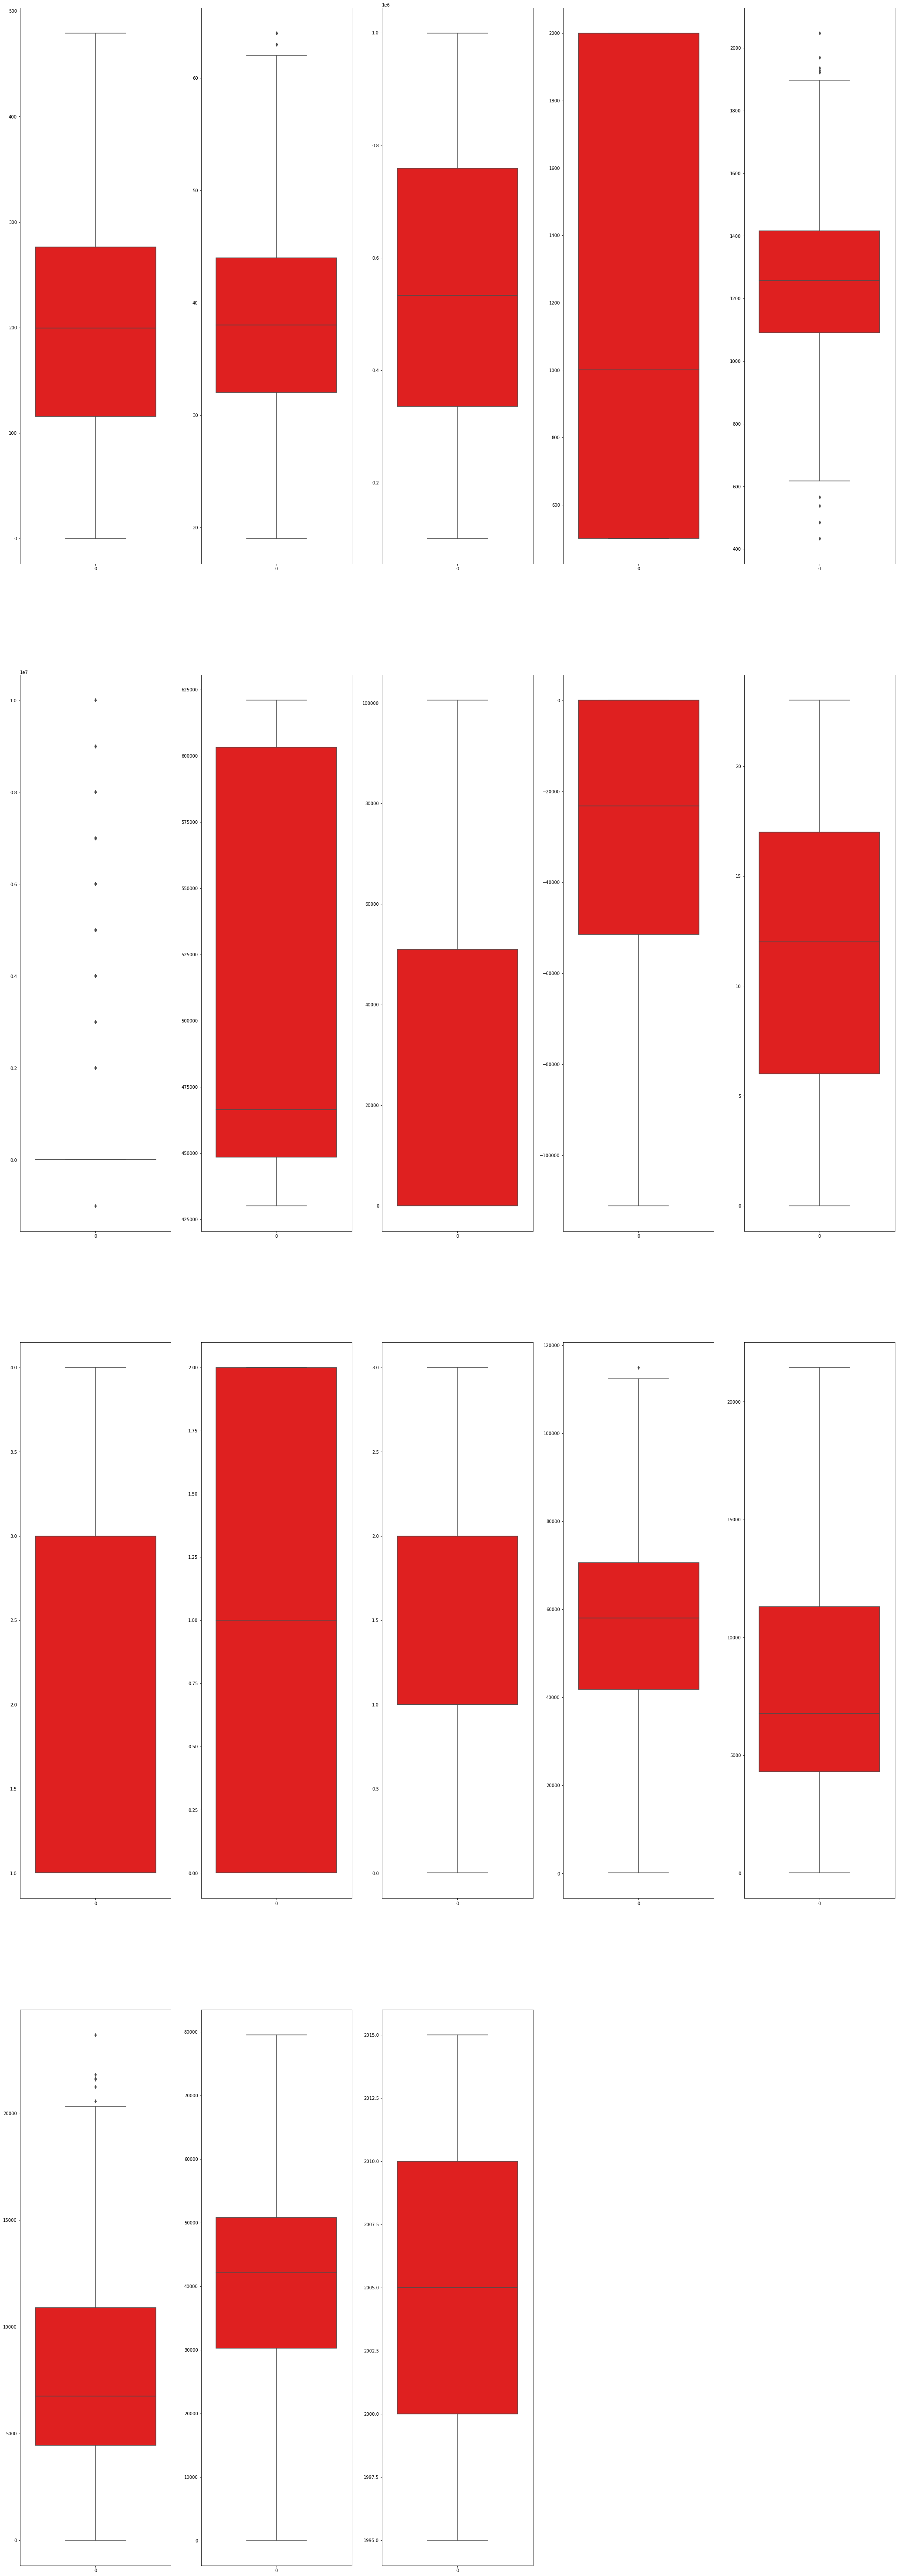

In [36]:
numcolnew= ['months_as_customer', 'age','policy_number', 'policy_deductable','policy_annual_premium', 'umbrella_limit', 'insured_zip','capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries','witnesses', 'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim','auto_year']
ncol=36
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(numcolnew)):
    plt.subplot(4,5,i+1)
    sns.boxplot(data=df[numcolnew[i]],color='red',orient='v')

There are no considerable outliers in the dataset which we need to remove.

# Bivariate Analysis

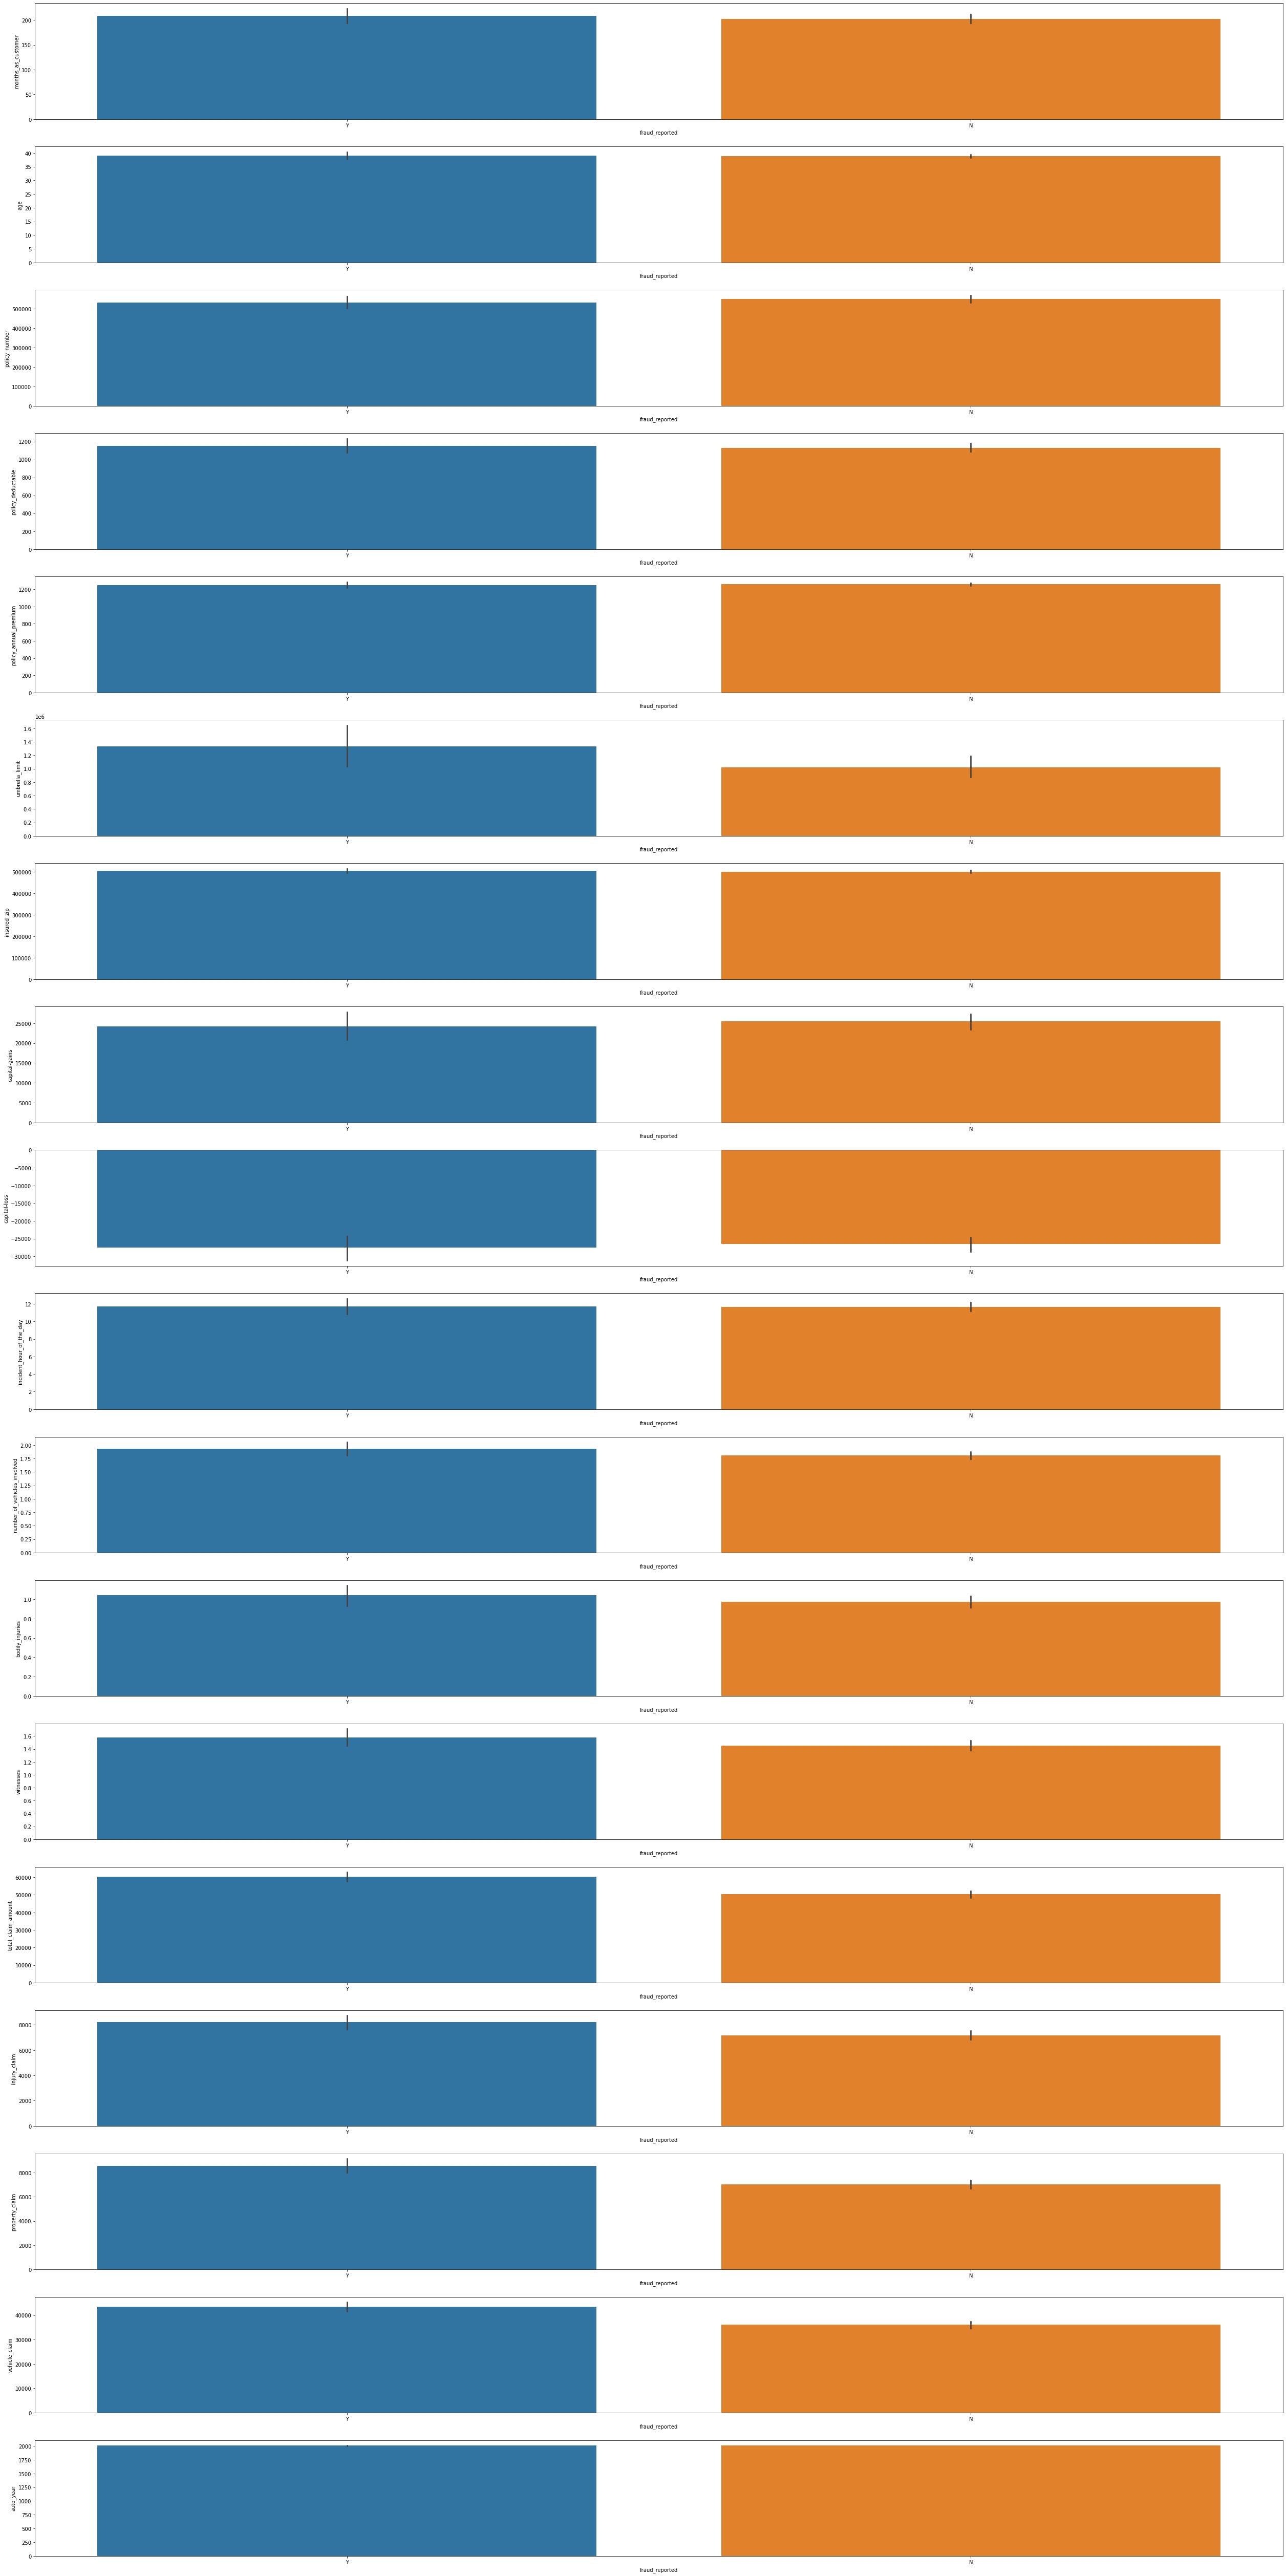

In [37]:
fig, axs = plt.subplots(18, figsize = (35,70))
plt1 = sns.barplot(y=df['months_as_customer'], x=df['fraud_reported'], ax = axs[0])
plt2 = sns.barplot(y=df['age'], x=df['fraud_reported'], ax=axs[1])
plt3 = sns.barplot(y=df['policy_number'], x=df['fraud_reported'], ax=axs[2])
plt4 = sns.barplot(y=df['policy_deductable'], x=df['fraud_reported'], ax=axs[3])
plt5 = sns.barplot(y=df['policy_annual_premium'], x=df['fraud_reported'], ax=axs[4])
plt6 = sns.barplot(y=df['umbrella_limit'], x=df['fraud_reported'], ax=axs[5])
plt7 = sns.barplot(y=df['insured_zip'], x=df['fraud_reported'], ax=axs[6])
plt8 = sns.barplot(y=df['capital-gains'], x=df['fraud_reported'], ax=axs[7])
plt9 = sns.barplot(y=df['capital-loss'], x=df['fraud_reported'], ax=axs[8])
plt10 = sns.barplot(y=df['incident_hour_of_the_day'], x=df['fraud_reported'],ax=axs[9])
plt11 = sns.barplot(y=df['number_of_vehicles_involved'], x=df['fraud_reported'], ax=axs[10])
plt12 = sns.barplot(y=df['bodily_injuries'], x=df['fraud_reported'], ax=axs[11])
plt13 = sns.barplot(y=df['witnesses'], x=df['fraud_reported'], ax=axs[12])
plt14 = sns.barplot(y=df['total_claim_amount'], x=df['fraud_reported'], ax=axs[13])
plt15 = sns.barplot(y=df['injury_claim'], x=df['fraud_reported'],ax=axs[14])
plt16 = sns.barplot(y=df['property_claim'], x=df['fraud_reported'], ax=axs[15])
plt17 = sns.barplot(y=df['vehicle_claim'], x=df['fraud_reported'], ax=axs[16])
plt18 = sns.barplot(y=df['auto_year'], x=df['fraud_reported'], ax=axs[17])
plt.tight_layout()

Here we can see that all the columns are adding values to the target variable.

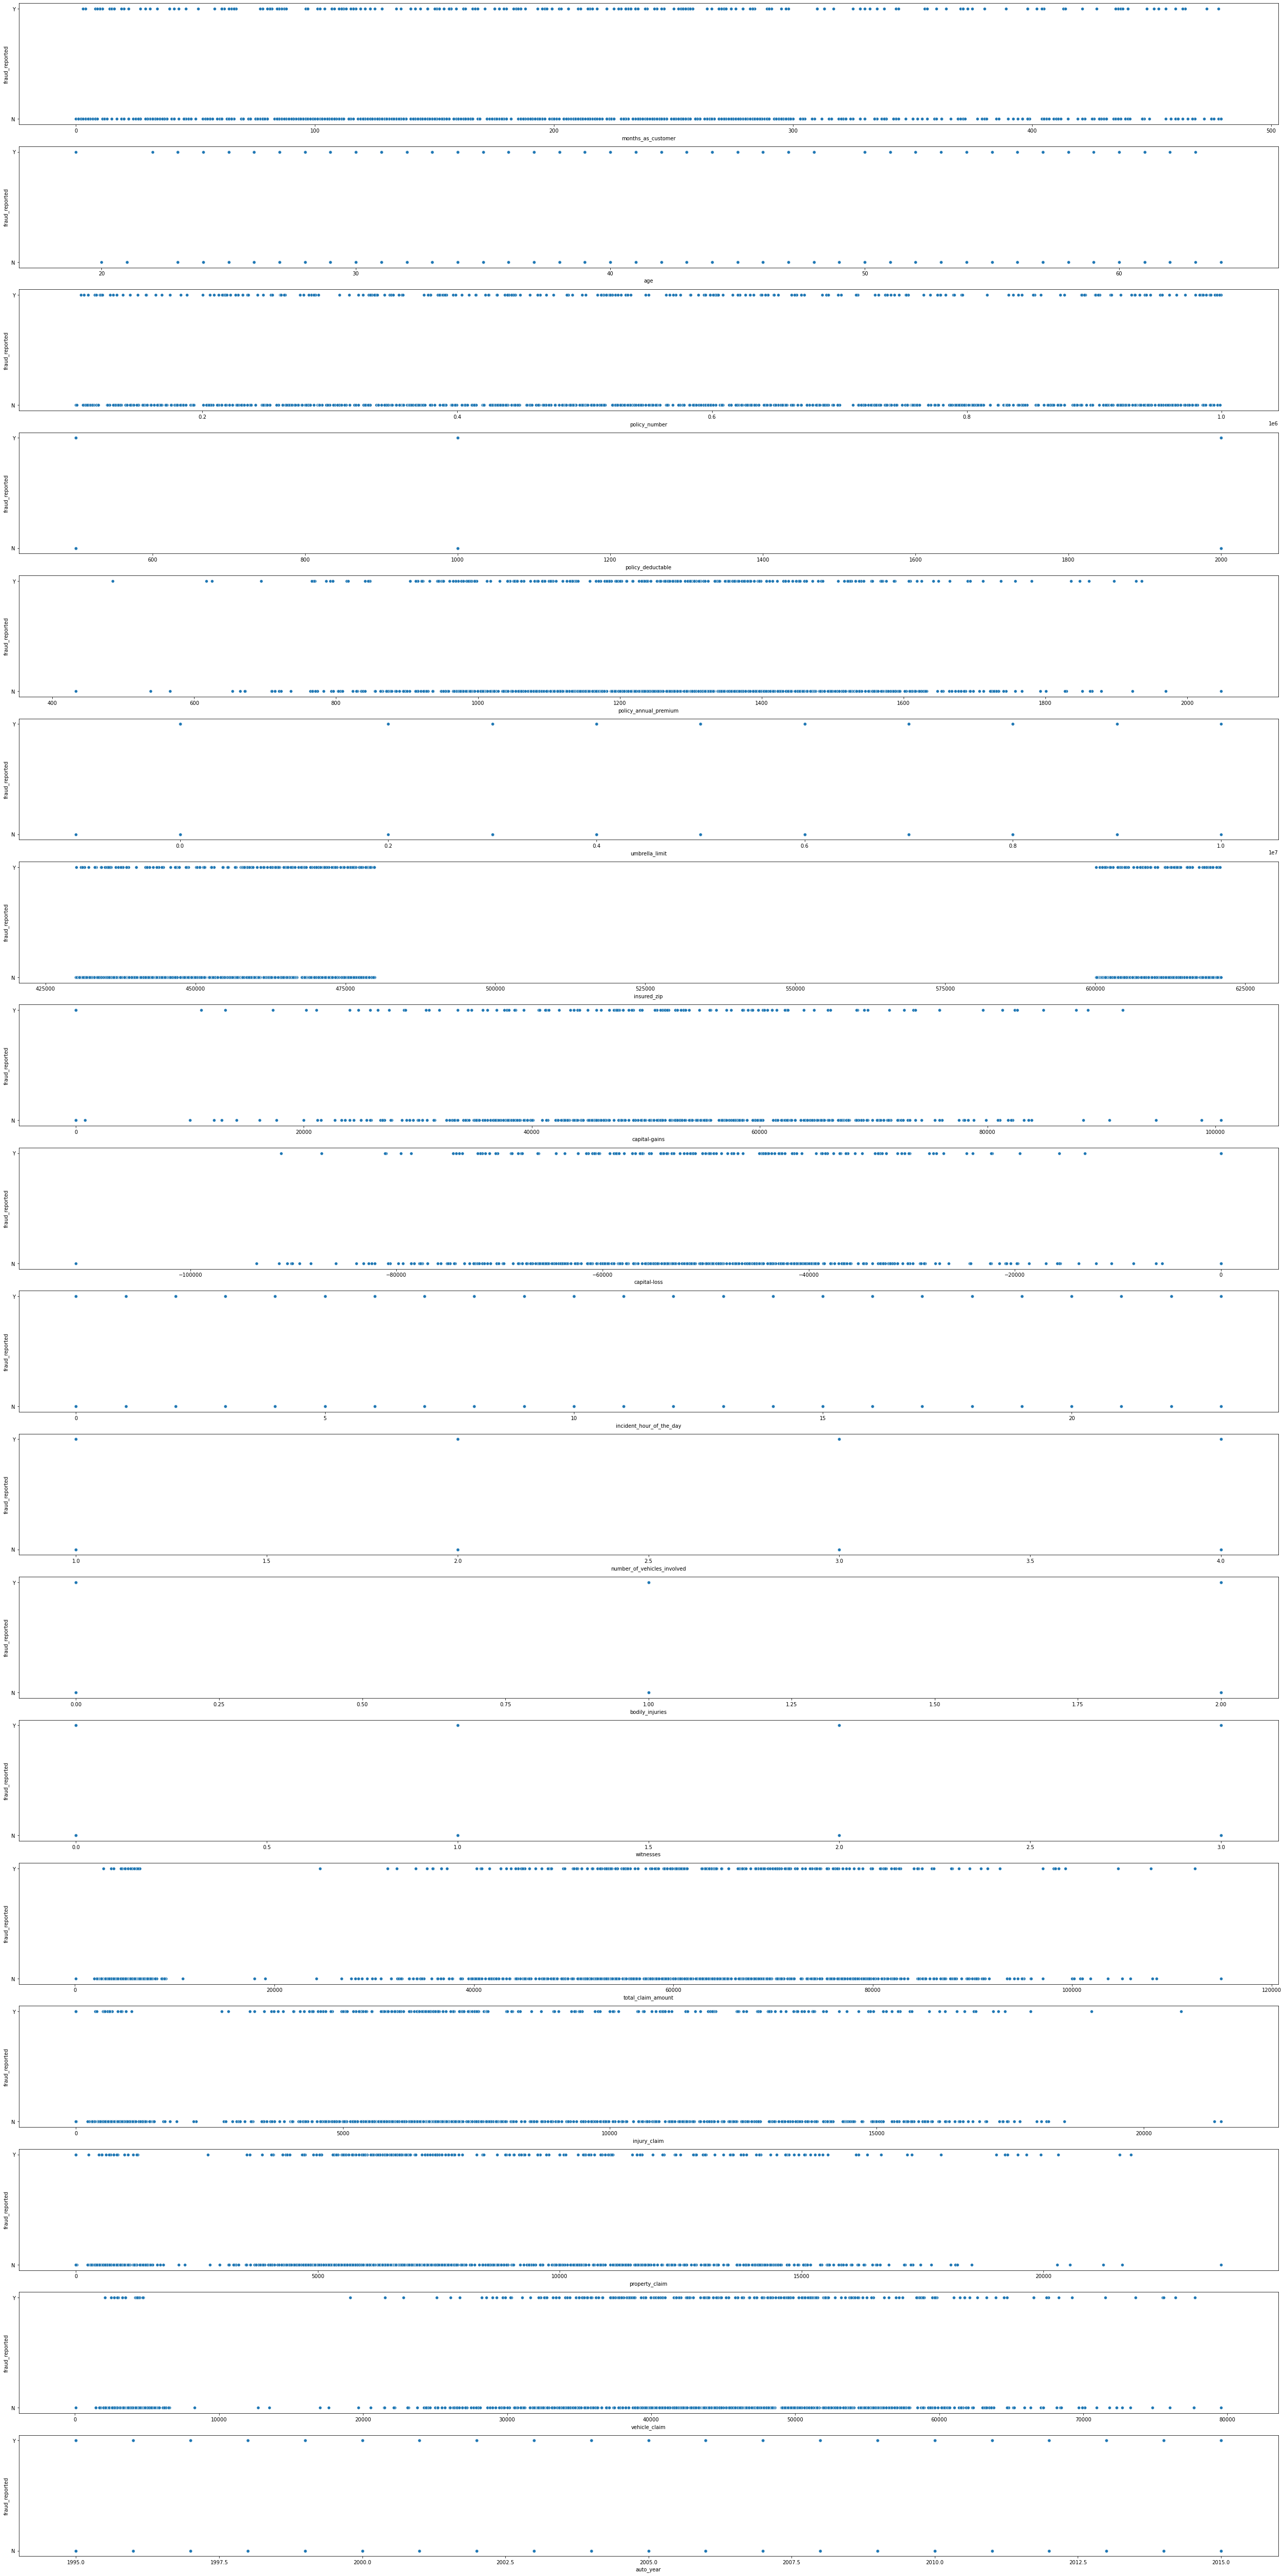

In [38]:
fig, axs = plt.subplots(18, figsize = (35,70))
plt1 = sns.scatterplot(x=df['months_as_customer'], y=df['fraud_reported'], ax = axs[0])
plt2 = sns.scatterplot(x=df['age'], y=df['fraud_reported'], ax=axs[1])
plt3 = sns.scatterplot(x=df['policy_number'], y=df['fraud_reported'], ax=axs[2])
plt4 = sns.scatterplot(x=df['policy_deductable'], y=df['fraud_reported'], ax=axs[3])
plt5 = sns.scatterplot(x=df['policy_annual_premium'], y=df['fraud_reported'], ax=axs[4])
plt6 = sns.scatterplot(x=df['umbrella_limit'], y=df['fraud_reported'], ax=axs[5])
plt7 = sns.scatterplot(x=df['insured_zip'], y=df['fraud_reported'], ax=axs[6])
plt8 = sns.scatterplot(x=df['capital-gains'], y=df['fraud_reported'], ax=axs[7])
plt9 = sns.scatterplot(x=df['capital-loss'], y=df['fraud_reported'], ax=axs[8])
plt10 = sns.scatterplot(x=df['incident_hour_of_the_day'], y=df['fraud_reported'],ax=axs[9])
plt11 = sns.scatterplot(x=df['number_of_vehicles_involved'], y=df['fraud_reported'], ax=axs[10])
plt12 = sns.scatterplot(x=df['bodily_injuries'], y=df['fraud_reported'], ax=axs[11])
plt13 = sns.scatterplot(x=df['witnesses'], y=df['fraud_reported'], ax=axs[12])
plt14 = sns.scatterplot(x=df['total_claim_amount'], y=df['fraud_reported'], ax=axs[13])
plt15 = sns.scatterplot(x=df['injury_claim'], y=df['fraud_reported'],ax=axs[14])
plt16 = sns.scatterplot(x=df['property_claim'], y=df['fraud_reported'], ax=axs[15])
plt17 = sns.scatterplot(x=df['vehicle_claim'], y=df['fraud_reported'], ax=axs[16])
plt18 = sns.scatterplot(x=df['auto_year'], y=df['fraud_reported'], ax=axs[17])
plt.tight_layout()

We can see that all the datas are spreaded very well over a wide range.

In [39]:
le=LabelEncoder()
cnt=0
for col in df :
    if df[col].dtype=='object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        cnt += 1
df        

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,1,46980,5220,5220,36540,1,5,1998,0


We have converted the object datatype into ordinal .

# Multivariate Analysis

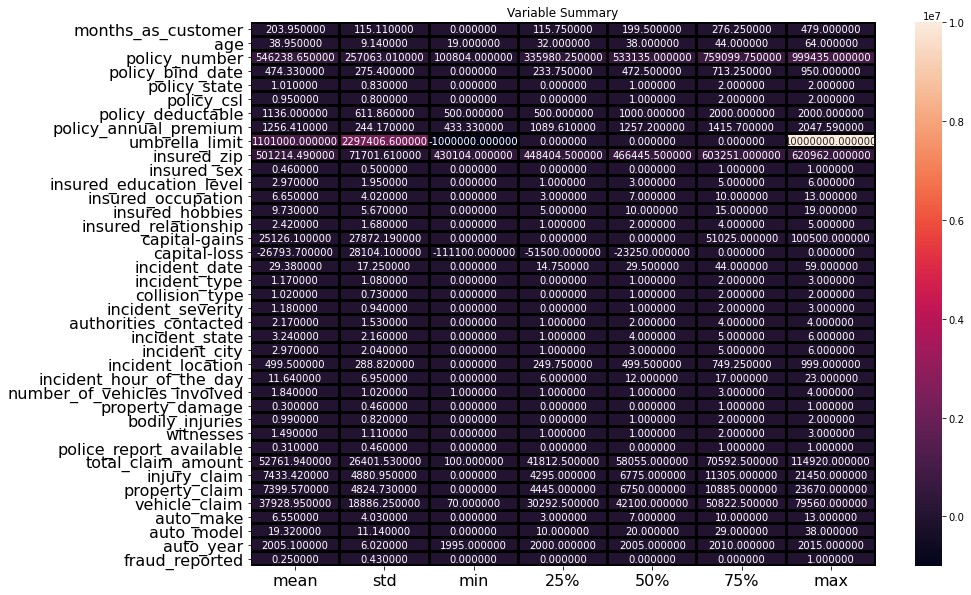

In [40]:
plt.figure(figsize=(14,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),lw=2,linecolor='black',annot=True,fmt='f',color='red')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Variable Summary')
plt.show()

It gives us the mean , median , mode , minimum, maximum of all the numeric columns.

<AxesSubplot:>

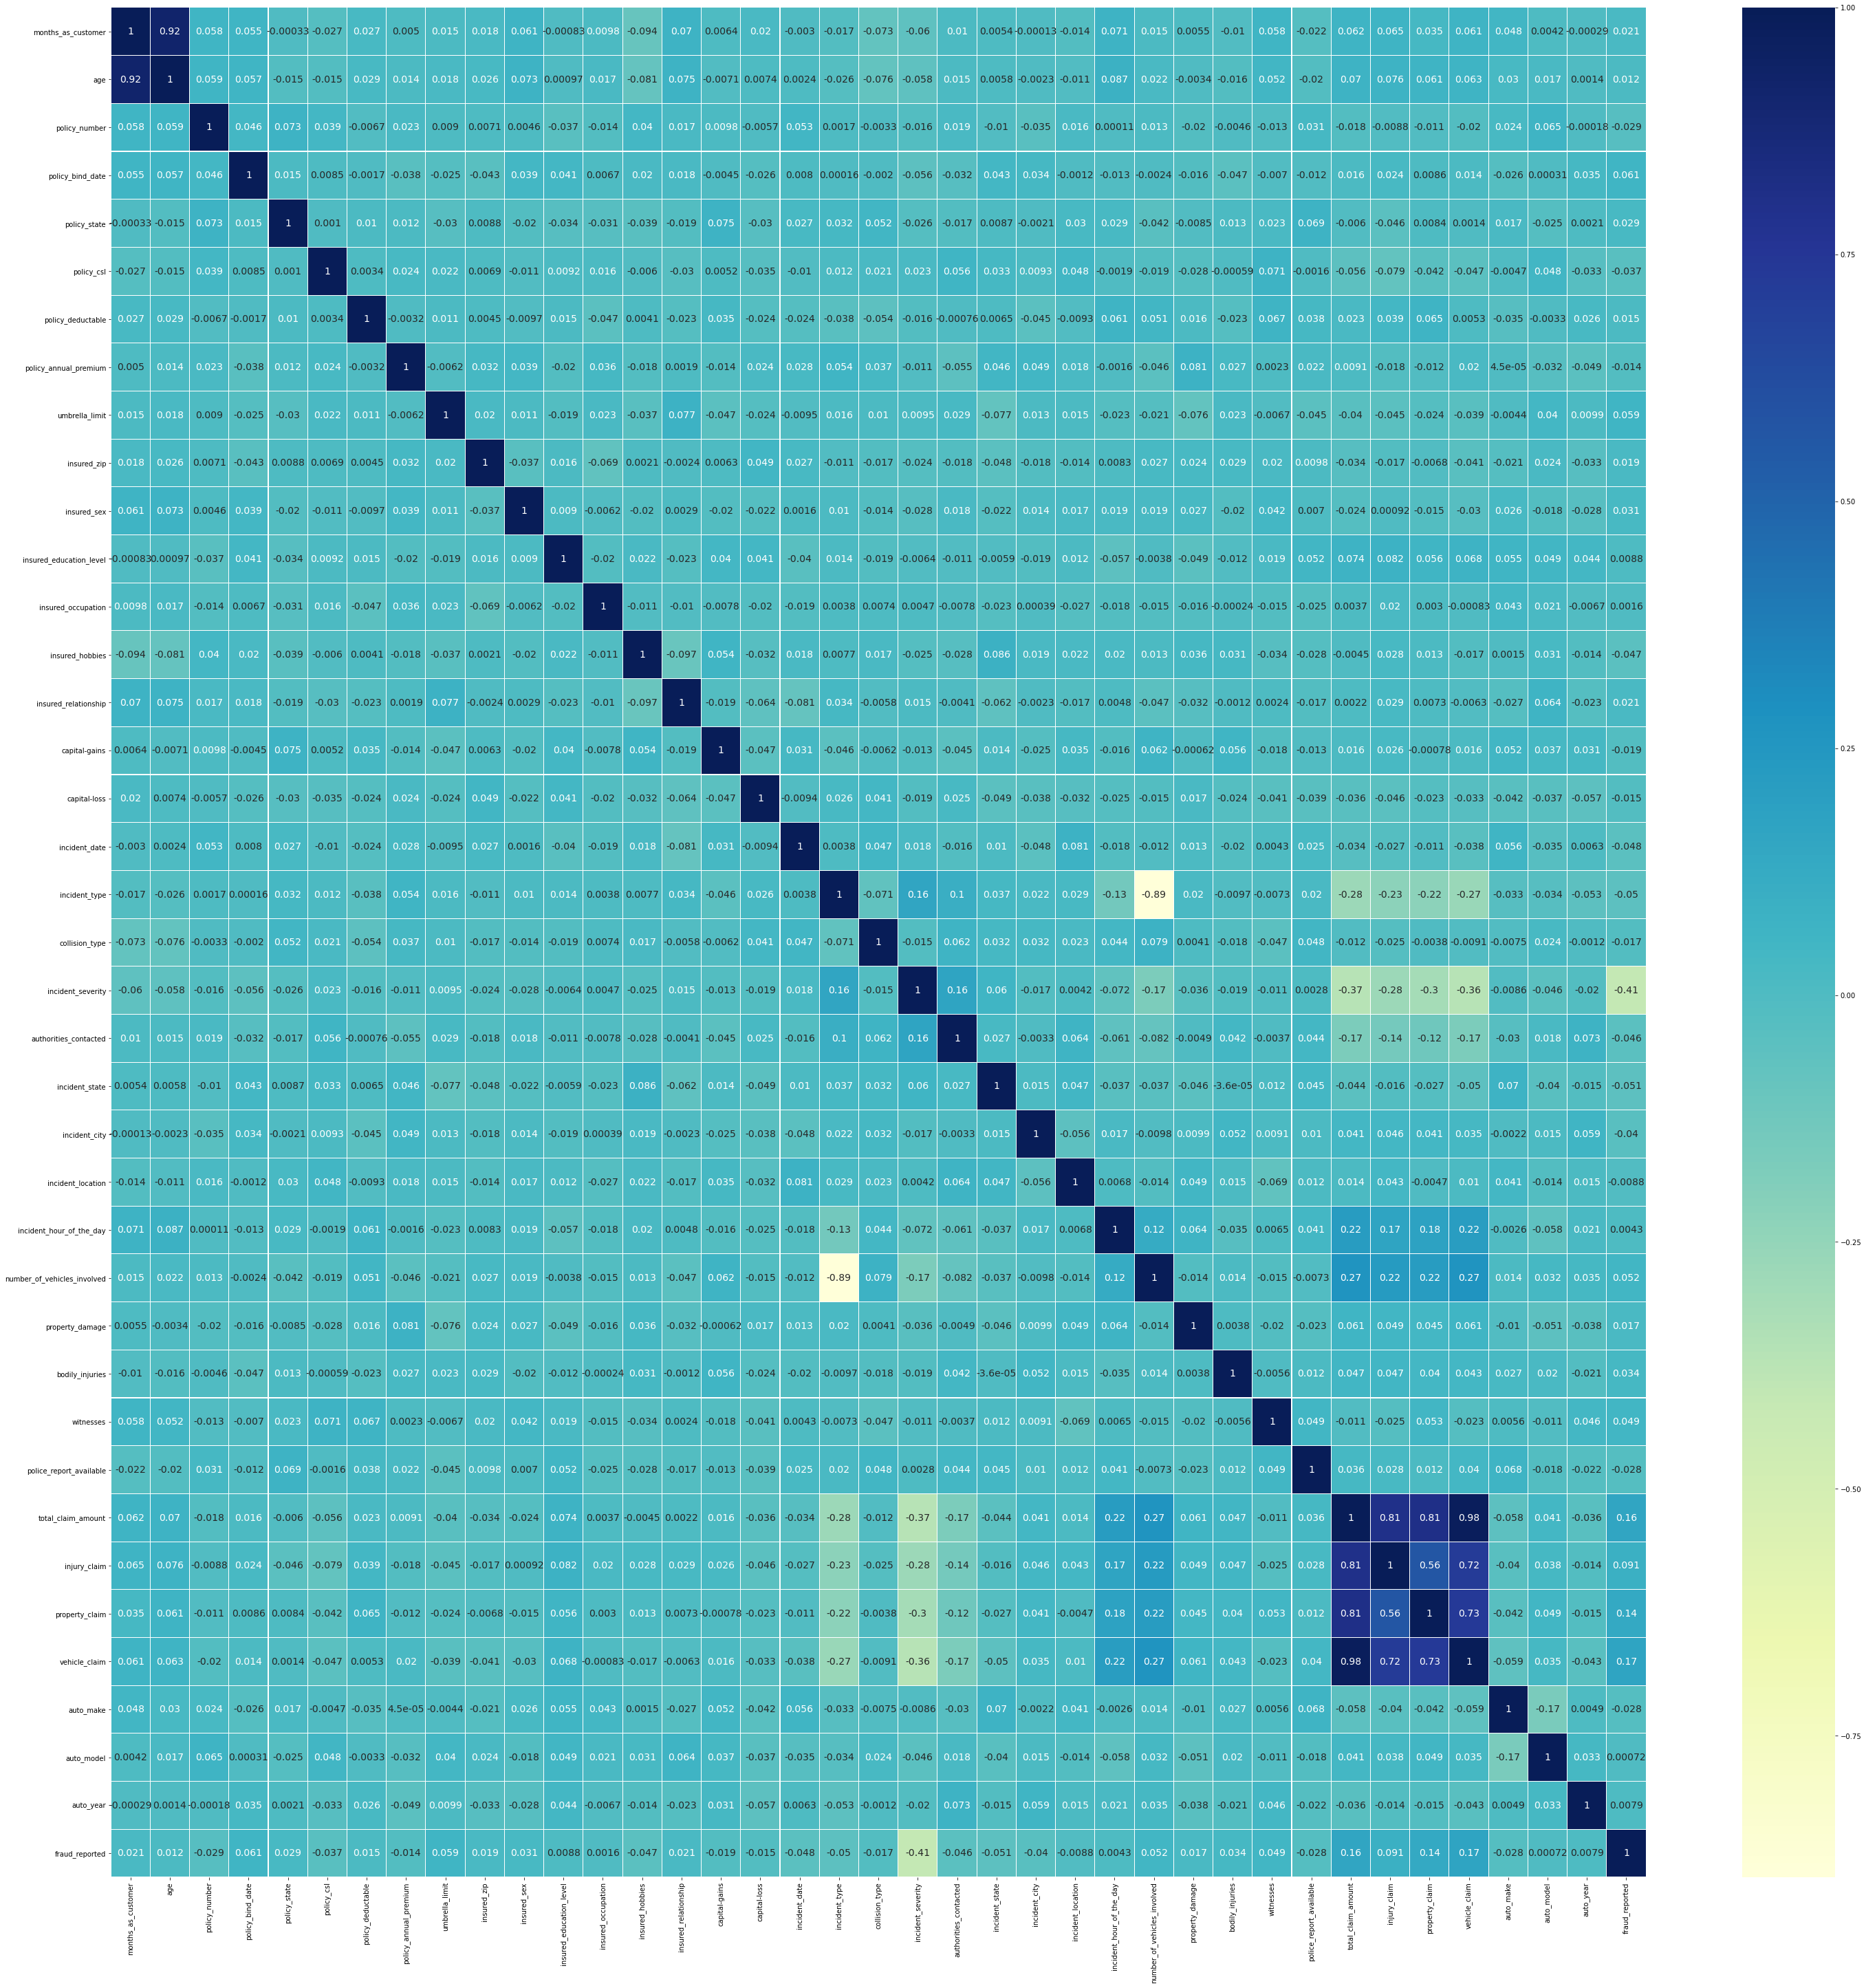

In [41]:
a=df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(a, linewidth=0.1, cmap="YlGnBu", annot = True, annot_kws={"size":14})

There exist multicollinearity between age and months_as_customer , vehicle claim and total claim amount, injure claim and total claim amount , property claim and total claim amount.

The correlation between 'auto_model' and target variable is negligible , hence we are dropping it as well.

In [42]:
df.drop(['age','injury_claim','auto_model'],axis=1,inplace=True)

We have dropped the three columns successfully.

# Data Transformation

In [43]:
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 31,  7,  7,  7,  6, 15,
        7,  7,  7], dtype=int64))


There are few outliers to be treated.

In [44]:
dfnew=df[(dfzscore<3).all(axis=1)]
df=dfnew
df

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,521585,532,2,1,1000,1406.91,0,466132,1,...,1,1,2,1,71610,13020,52080,10,2004,1
1,228,342868,821,1,1,2000,1197.22,5000000,468176,1,...,0,0,0,0,5070,780,3510,8,2007,1
2,134,687698,186,2,0,2000,1413.14,5000000,430632,0,...,0,2,3,0,34650,3850,23100,4,2007,0
3,256,227811,766,0,1,2000,1415.74,6000000,608117,0,...,0,1,2,0,63400,6340,50720,3,2014,1
4,228,367455,181,0,2,1000,1583.91,6000000,610706,1,...,0,0,1,0,6500,650,4550,0,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,941851,487,2,2,1000,1310.80,0,431289,0,...,1,0,1,0,87200,8720,61040,6,2006,0
996,285,186934,129,0,0,1000,1436.79,0,608177,0,...,1,2,3,0,108480,18080,72320,13,2015,0
997,130,918516,509,2,1,500,1383.49,3000000,442797,0,...,0,2,3,1,67500,7500,52500,11,1996,0
998,458,533940,573,0,2,2000,1356.92,5000000,441714,1,...,0,0,1,1,46980,5220,36540,1,1998,0


Now there are 980 rows in the dataset after treating the outliers.

In [45]:
print((20/1000)*100,'%')

2.0 %


There is 2% data loss after removing outliers.

In [46]:
x= df.iloc[:,1:-1]
y = df.iloc[:,-1]
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)

We have separated the feature and target variables into x and y respectively. Then we have applied power transformation and finally we have scaled the data.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

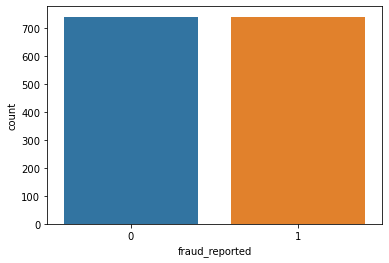

In [47]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y = smt.fit_resample(x,y)
sns.countplot(y)

Balancing the class of target variable.

# Model Building

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_train_lr=lr.predict(x_train)
predlr=lr.predict(x_test)
print('Accuracy of Logistic Regression is',(accuracy_score(y_test,predlr))*100,'%')

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy of RandomForest Classifier is',(accuracy_score(y_test,predrf))*100,'%')

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
predkn=kn.predict(x_test)
print('Accuracy of KNeighbors Classifier is',(accuracy_score(y_test,predkn))*100,'%')

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print('Accuracy of DecisionTree Classifier is',(accuracy_score(y_test,preddt))*100,'%')

sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print('Accuracy of SVC is',(accuracy_score(y_test,predsv))*100,'%')

Accuracy of Logistic Regression is 78.04054054054053 %
Accuracy of RandomForest Classifier is 88.51351351351352 %
Accuracy of KNeighbors Classifier is 68.24324324324324 %
Accuracy of DecisionTree Classifier is 87.83783783783784 %
Accuracy of SVC is 86.48648648648648 %


The highest accuracy we got is for RandomForestClassifier followed by DecisionTreeClassifiers and SVC.

# Cross Validation Score

In [49]:
print("CVS for Logistic Regression =",cvs(lr,x,y,cv=5).mean()*100,"%")
print("CVS for Random Forest Classifier =",cvs(rf,x,y,cv=5).mean()*100,"%")
print("CVS for K-Neighbor Classifier =",cvs(kn,x,y,cv=4).mean()*100,"%")
print("CVS for DecisionTree Classifier =",cvs(dt,x,y,cv=5).mean()*100,"%")
print("CVS for Support Vector Machine Classifier =",cvs(sv,x,y,cv=5).mean()*100,"%")

CVS for Logistic Regression = 75.13513513513513 %
CVS for Random Forest Classifier = 88.89189189189189 %
CVS for K-Neighbor Classifier = 67.5 %
CVS for DecisionTree Classifier = 83.04054054054055 %
CVS for Support Vector Machine Classifier = 87.83783783783784 %


The difference between accuracy and cvs is least for RandomForestClassifier. Hence we will apply Hyper Parameter Tuning on it. 

# Hyper Parameter Tuning

In [50]:
parameter={'n_estimators':np.arange(50,300,50),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2'],
          'class_weight':['balanced', 'balanced_subsample']}
gvc = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gvc.fit(x_train,y_train)
gvc.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 100}

We get the best parameters to be used in RandomForestClassifier() to increase it's accuracy.

In [51]:
FraudDetection = RandomForestClassifier(criterion='gini', n_estimators=100, max_features='sqrt', class_weight='balanced_subsample')
FraudDetection.fit(x_train,y_train)
pred=FraudDetection.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classifier of Final Fraud Detection  Model is", acc*100, "%")

Accuracy of Random Forest Classifier of Final Fraud Detection  Model is 91.04054054054055 %


The accuracy of our final model has been increased after applying Hyper Parameter Tuning. 

# AUC-ROC CURVE

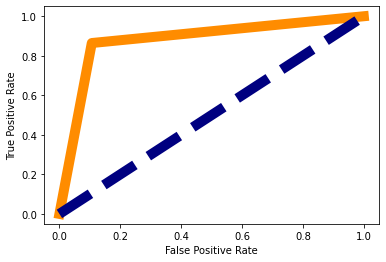

In [52]:
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE")
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Since the preprocessed data and the hyper parameter tuned model is working well. Hence we will choose that only.

# Conclusion

In [53]:
a= np.array(y_test)
predicted = np.array(FraudDetection.predict(x_test))
Fraudetection=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
Fraudetection

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
291,0,0
292,1,1
293,1,1
294,1,1


We can see that all the predicted values are equal to the original values. Hence we conclude that our model is working really well.

# Model Saving

In [54]:
import pickle
filename = 'Fraud_Detection.pkl'
pickle.dump(FraudDetection,open(filename,'wb'))

We have saved our final model .